## INTRODUCTION TO MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import quandl,math, datetime
from sklearn import preprocessing, svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [ ]:
quandl.ApiConfig.api_key = "mcseWdy4Juq_2h8ux3ss"
df = quandl.get("WIKI/GOOGL")
print(df.head())

In [ ]:
## Selecting feature variables from the dataset
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df

In [ ]:
## Getting the percent volatility for the day 
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100
## Getting the stoke price percent change for the day
df['PCT_Change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100
df

In [ ]:
## Selecting new fearures that has a defined relationship to help simple linear regression have a better prediction
df = df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume',]]
df

In [ ]:
# Selecting the label
forcast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.001*len(df)))
df['Label'] = df[forcast_col].shift(-forecast_out)
df.head()

In [ ]:
# Passing selected feature and label to X and y respectively
X = np.array(df.drop(['Label'],1))

In [ ]:
# Scaling X(feature) to have a common scale point across all the data piont
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]# grabs data for days ahead depending on the size of the df
X = X[:-forecast_out]# grabs data for the last days depending on the size of the df
df.dropna(inplace=True)
y = np.array(df['Label'])

In [ ]:
# Checking to see if data records across X and y are the same
print(len(X),len(y))

In [ ]:
# Split X and y to training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# Define our model classifier
clf = LinearRegression(n_jobs=-1) # (n_jobs: Number of jobs/threads that can be run at any given time)Tells how many trends you want the training to run under your CPU. (-1: run as many as you can)

#Fitting the training set to the classifier
clf.fit(X_train,y_train)

#save the mode to pickle
# with open('linerregression.pickle', 'wb') as f:
#     pickle.dump(clf,f)
    
pickle_in = open('linerregression.pickle','rb')
clf = pickle.load(pickle_in)

#Test our model with the test set
accuracy = clf.score(X_test,y_test)
accuracy

In [ ]:
#Predict pice fo the lately data
forecast_set = clf.predict(X_lately)
forecast_set

In [ ]:
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day #next day

In [ ]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

In [ ]:
df['Adj. Close'].plot()
df['Forecast'].plot(figsize=(30, 10))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Building a linear regression from scratch

In [5]:
from statistics import mean
import random

In [ ]:
# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,4,6,5,6,7], dtype=np.float64)


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1 
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
        
    return np.array(xs, dtype=np.float64),np.array(ys, dtype=np.float64)

In [ ]:
def best_fit_slope_and_intercept(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys) ) / ((mean(xs)**2) - mean(xs**2)) ) 
    b = (mean(ys)) - (m * mean(xs))
    return m,b

# Calculating the accuracy of the model wirh R^2 = 1 - [(Squared error of y-regression line) / ( Squared error of the y-mean)].

def squared_error(ys_orig,ys_lines):
    
    return sum((ys_lines-ys_orig)**2)

def coef_of_determ(ys_orig,ys_lines):
    y_mean_lines = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_lines)
    squared_error_y_mean = squared_error(ys_orig,y_mean_lines)
    return 1 - (squared_error_regr/squared_error_y_mean)

xs,ys = create_dataset(40,10,2,correlation='pos')

m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

In [ ]:
regression_line = [(m*x)+b for x in xs]
# regression_line

In [ ]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [ ]:
#predicting
predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coef_of_determ(ys,regression_line)
print(r_squared)

In [ ]:
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y, color='green')
plt.plot(xs,regression_line)
plt.show()

In [ ]:
##=================================================
# Concepts of KNN Classification

df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)
df.drop(['Unnamed: 11'],1,inplace=True)
df.head()

In [ ]:
df.columns

In [ ]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
clf = neighbors.KNeighborsClassifier()

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test)
accuracy_score = clf.score(X_test,y_test)
accuracy_score

In [ ]:
example_measure = np.array([[2,4,2,3,4,5,1,2,2]])
example_measure = example_measure.reshape(len(example_measure),-1)
clf.predict(example_measure)

In [6]:
## Understanding KNN from scratch

from math import sqrt
from collections import Counter
import warnings

In [ ]:
# plot_1 = [1,3]
# plot_2 = [2,5]

# eucld_distances = []
# for p1,p2 in zip(plot_1,plot_2):
#     print(p1,"=======",p2)
#     eucld_distance = (p1-p2)**2
#     eucld_distances.append(eucld_distance)
# euclidean_distance = sqrt(sum(eucld_distances))
# euclidean_distance


dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_feature = [5,7]

# [[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# plt.show()

In [ ]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data) >= k:
        warnings.warn("K is set to a value less than total voting group")
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1]/k
    return vote_result,confidence

In [ ]:
result,confidence = k_nearest_neighbors(dataset,new_feature)
print(result,confidence)

In [ ]:
df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)
df.drop(['Unnamed: 11'],1,inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)
full_data[:10]

In [ ]:
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [ ]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [ ]:
correct = 0
total = 0 

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set,data,k=5)
        if group == vote:
            correct += 1
        total += 1
        
correct/total

In [2]:
##=================================================
# Implementation of Support Vector Machine

df = pd.read_csv("breast-cancer-wisconsin.data")
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace=True)
df.drop(['Unnamed: 11'],1,inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [3]:
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [5]:
clf = svm.SVC()

In [6]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
clf.predict(X_test)
accuracy_score = clf.score(X_test,y_test)
accuracy_score

0.6785714285714286

## Creating An SVM from scratch

In [24]:
class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


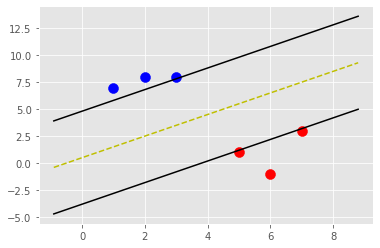

In [25]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize()

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


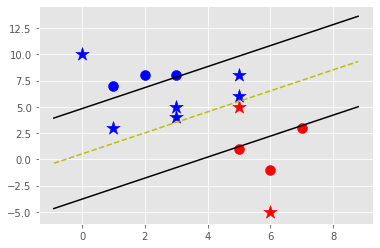

In [28]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)
predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

## Kernel

In [2]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers

     pcost       dcost       gap    pres   dres
 0: -1.7777e+01 -3.2171e+01  5e+02  2e+01  2e+00
 1: -1.9548e+01 -1.0004e+01  1e+02  5e+00  4e-01
 2: -1.7590e+01 -7.5546e+00  9e+01  3e+00  3e-01
 3: -5.3051e+00 -3.4826e+00  1e+01  4e-01  3e-02
 4: -2.7508e+00 -2.9725e+00  1e+00  4e-02  3e-03
 5: -2.7965e+00 -2.8942e+00  1e-01  6e-04  4e-05
 6: -2.8878e+00 -2.8888e+00  1e-03  6e-06  4e-07
 7: -2.8887e+00 -2.8887e+00  1e-05  6e-08  4e-09
 8: -2.8887e+00 -2.8887e+00  1e-07  6e-10  4e-11
Optimal solution found.
3 support vectors out of 180 points
20 out of 20 predictions correct


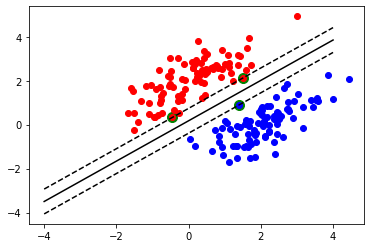

In [5]:
# Mathieu Blondel, September 2010
# License: BSD 3 clause
# http://www.mblondel.org/journal/2010/09/19/support-vector-machines-in-python/

# visualizing what translating to another dimension does
# and bringing back to 2D:
# https://www.youtube.com/watch?v=3liCbRZPrZA

# Docs: http://cvxopt.org/userguide/coneprog.html#quadratic-programming
# Docs qp example: http://cvxopt.org/examples/tutorial/qp.html

# Nice tutorial:
# https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf

             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
#     test_linear()
#     test_non_linear()
#     test_soft()

## Unsupervised Machine Learning (CLUSTERING)

#### CLUSTERING: K- MEANS

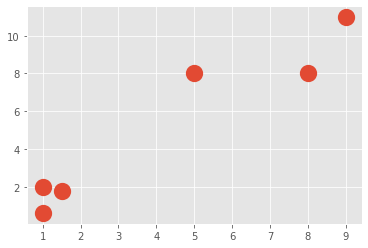

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

#ORIGINAL:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()

In [5]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
centroids = clf.cluster_centers_
labels = clf.labels_
print(centroids,"===============",labels)

[[7.33333333 9.        ]
 [1.16666667 1.46666667]] =============== [1 1 0 0 1 0]


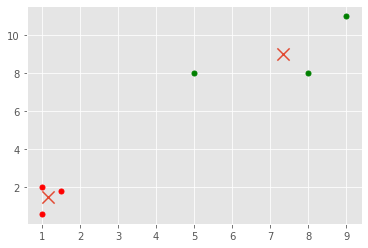

In [7]:
colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

## Working with Titanic Dataset

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')

In [3]:
## Data dictionary (https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls)

"""
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Choldren Aboard
ticket Ticket NUmber
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination

"""
df = pd.read_excel('titanic.xls')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.drop(['body','name'],1, inplace=True)
df.fillna(0,inplace=True)
df.infer_objects().dtypes
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [5]:
df.dtypes

pclass         int64
survived       int64
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
home.dest     object
dtype: object

In [6]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['boat'],1, inplace=True)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,0,29.0000,0,0,751,211.3375,171,1,105
1,1,1,1,0.9167,1,2,515,151.5500,16,1,314
2,1,0,0,2.0000,1,2,515,151.5500,16,1,314
3,1,0,1,30.0000,1,2,515,151.5500,16,1,314
4,1,0,0,25.0000,1,2,515,151.5500,16,1,314


In [7]:
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [8]:
clf = KMeans(n_clusters=2)
clf.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
correct = 0 
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1,len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
correct/len(X)

0.692131398013751

## KMeans Algorithm from scratch

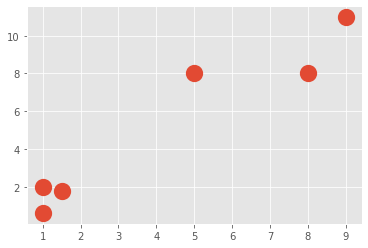

In [10]:
#ORIGINAL:

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


plt.scatter(X[:, 0],X[:, 1], s=150, linewidths = 5, zorder = 10)
plt.show()

In [11]:
colors = 10*["g","r","c","b","k"]

class K_Means:
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self,data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                currect_centroid = self.centroids[c]
                if np.sum((currect_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
                    
            if optimized:
                break
    
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return(classification)

In [12]:
clf = K_Means()
clf.fit(X)

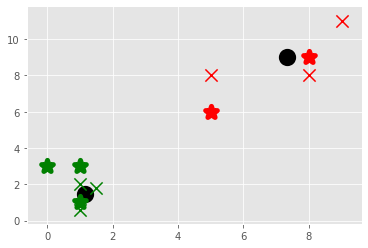

In [13]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1], marker='o',color='k',s=150,linewidths=5)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1],marker='x',color=color,s=150,linewidths=5)

        unknowns = np.array([[1,3],[8,9],[0,3],[5,6],[1,1],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0],unknown[1], marker='*', color=colors[classification],s=150,linewidths=5)
    
plt.show()

## Mean Shift (HIERARCHICAL CLUSTERING)

C:\Users\Winner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


[[3.47091869 3.43155778 3.60912357]
 [2.86759032 9.93367133 9.66994919]]
Number of estimated clusters: 2


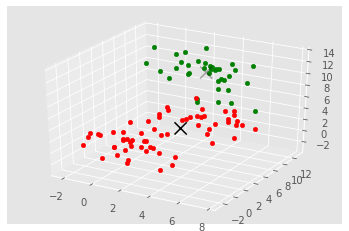

In [14]:
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()


In [16]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [18]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [19]:
original_df['cluster_group']=np.nan

In [20]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

C:\Users\Winner\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    #print(temp_df.head())

    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]

    survival_rate = len(survival_cluster) / len(temp_df)
    #print(i,survival_rate)
    survival_rates[i] = survival_rate
    
print(survival_rates)

{0: 0.37110933758978454, 1: 0.7073170731707317, 2: 1.0, 3: 0.1, 4: 1.0}


## Mean Shift Clustering algorithm From Scratch

In [22]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids

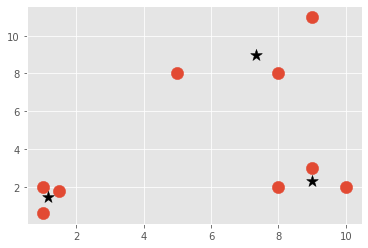

In [23]:
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()